<a href="https://colab.research.google.com/github/hajyhia/Plant-Diseases-Classification/blob/main/streamlit_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit pyngrok
!pip install gdown
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install pillow
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import os
import gdown

file_id = '1ArPM3W6AxKOEAy823-YXLTgE7O51FEd3' # replace with your actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'

os.makedirs('/content/working', exist_ok=True)

# Output file name
output = '/content/working/diseases_labels'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)
  print(f"\nDownloading File {output} ...")
else:
  print(f"File found at {output}")

with open(output, "r") as f:
  class_labels = [line.strip() for line in f ]

print('\n'.join(class_labels))

Downloading...
From: https://drive.google.com/uc?export=download&id=1ArPM3W6AxKOEAy823-YXLTgE7O51FEd3
To: /content/working/diseases_labels
100%|██████████| 984/984 [00:00<00:00, 1.69MB/s]


Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import load_model
import numpy as np
import os
import gdown
import warnings
warnings.filterwarnings('ignore')
print('compelet')


file_id = '130Q9OKIFUTz5a-i1-oCge0pAF1vuEa-C' # replace with your actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'

os.makedirs('/content/working', exist_ok=True)

# Output file name
output = '/content/working/cnn_crops_model.keras'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)
  print(f"Downloading File {output} ...")
else:
  print(f"File found at {output}")

if os.path.exists(output):
  print("Attempting to load the Crop Disease Detection Model {{output}}.")

  model = load_model(output)
  print("The Crop Disease Detection Model loaded successfully!")
  print("Model summary:")

  # Display model summary as text
  stringlist = []
  model.summary(print_fn=lambda x: stringlist.append(x))
  summary = "\n".join(stringlist)
  print(summary)

else:
  st.error(f"File not found at {output}")

  # Optionally remove the temp file
  # os.remove(tmp_path)


1000
(1000, 400)


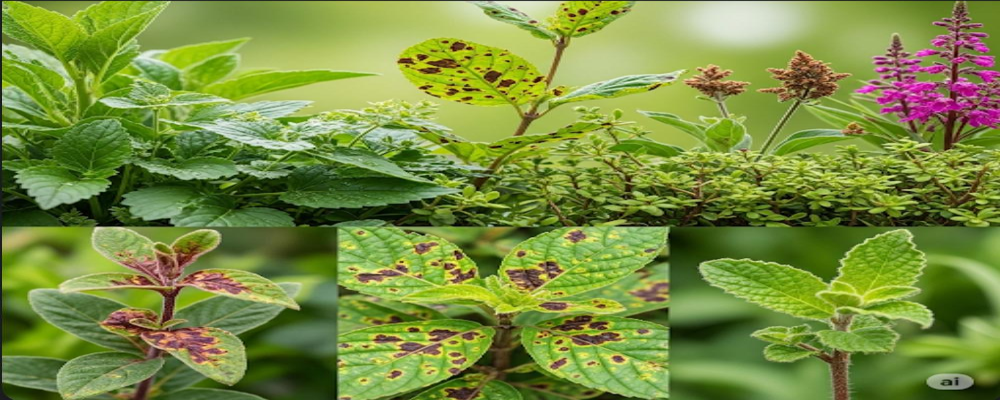

In [24]:
import streamlit as st
from PIL import Image
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import tempfile
from io import BytesIO
import numpy as np
import gdown
import requests
response = requests.get("https://drive.google.com/uc?export=download&id=16mu1HJX-z2IMbDWxq08nNDs3NGeA5T-r")
img = Image.open(BytesIO(response.content))
print(img.size[0])
img = img.resize((1000, 400))
print(img.size)
img

In [31]:
%%writefile app.py
import streamlit as st
from PIL import Image
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import tempfile
from io import BytesIO
import os
import numpy as np
import gdown
import requests

st.title("Crop Disease Detection")

# render title image
response = requests.get("https://drive.google.com/uc?export=download&id=16mu1HJX-z2IMbDWxq08nNDs3NGeA5T-r")
img = Image.open(BytesIO(response.content))
img = img.resize((img.size[0], 400))
st.image(img, use_container_width=True)

os.makedirs('/content/working', exist_ok=True)

# file_id = '130Q9OKIFUTz5a-i1-oCge0pAF1vuEa-C' # replace with your actual file ID
# url = f'https://drive.google.com/uc?export=download&id={file_id}'

# # Output file name
# output = '/content/working/diseases_labels'

# if not os.path.exists(output):
#   gdown.download(url, output, quiet=False)
#   st.write(f"Downloading File {output} ...")
# else:
#   st.write(f"File found at {output}")

# with open(output, "r") as f:
#   class_labels = [line.strip() for line in f ]
class_labels = class_labels = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


class_labels = list(class_labels)

basic_model_file_id = '1IsZ2HP579LtWvQfmMp3fGMFiDaJfrWS5'  # replace with your actual file ID
MobileNetV2_file_id = '1ijhAbY12g7eAch5vXxLBkiA7BwDVOH1s'

# Output file name
output = '/content/working/cnn_crops_model.keras'
output_MobileNetV2 = '/content/working/cnn_crops_MobileNetV2.keras'

if not os.path.exists(output):
  st.write(f"Downloading File '{output.split('/')[3]}' ...")
  gdown.download(f'https://drive.google.com/uc?export=download&id={basic_model_file_id}', output, quiet=False)
  gdown.download(f'https://drive.google.com/uc?export=download&id={MobileNetV2_file_id}', output_MobileNetV2, quiet=False)
else:
  st.write(f"File '{output.split('/')[3]}' was found")

if os.path.exists(output):
  st.write(f"Attempting to load the model '{output.split('/')[3]}'.")

  model = load_model(output)
  MobileNetV2 = load_model(output_MobileNetV2)
  st.success("The Crop Disease Detection Model loaded successfully!")

else:
  st.error(f"File not found at {output}")

  # Optionally remove the temp file
  # os.remove(tmp_path)

# Create a checkbox
use_MobileNetV2 = st.checkbox("Use MobileNetV2 Model")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# If an image is uploaded
if uploaded_file is not None:
    # Open the image
    image = Image.open(uploaded_file)

    # Display image details
    st.write("**Filename:**", uploaded_file.name)
    st.write("**Format:**", image.format)
    st.write("**Size:**", image.size)

    # Show the image
    st.image(image, caption="Uploaded Image")

    # Resize to model's expected input size
    target_size = model.input_shape[1:3]  # (height, width)
    image = image.resize(target_size)

    img_array = np.array(image) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    if use_MobileNetV2:
      prediction = MobileNetV2.predict(img_array)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]

    # extract the label (name of image)
    true_label = uploaded_file.name.split('.')[0]

    # get the prediction class
    # class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # st.write(f"**True Label:** {true_label}")
    st.write(f"**predicted_class:** {predicted_class}")
    st.success(f"**Predicted Crop Disease:** {predicted_label}")

# Create a checkbox
show_text = st.checkbox("Show Model Summary")

# Conditional logic
if show_text:
  st.write("Model summary:")

  # Display model summary as text
  stringlist = []
  if use_MobileNetV2:
    MobileNetV2.summary(print_fn=lambda x: stringlist.append(x))
  else:
    model.summary(print_fn=lambda x: stringlist.append(x))
  summary = "\n".join(stringlist)
  st.text(summary)

Overwriting app.py


In [29]:
# Run Streamlit in the background
!streamlit run app.py &> /dev/null &

In [28]:
!pkill streamlit

In [4]:
from pyngrok import ngrok
import os
import subprocess
from google.colab import userdata

os.environ["PYNGROK_AUTH_TOKEN"] = userdata.get('pyngrok_auth_token')

# Kill any existing tunnels
ngrok.kill()

ngrok_authtoken = os.getenv("PYNGROK_AUTH_TOKEN")


# Set the ngrok authtoken
try:
    ngrok.set_auth_token(ngrok_authtoken)
    print("Ngrok authtoken set successfully.")

    # Open a tunnel to streamlit port 8501
    http_tunnel = ngrok.connect(8501)
    print("Public URL:", http_tunnel.public_url)
except Exception as e:
    print(f"Error setting ngrok authtoken: {e}")
    # Handle the error appropriately, e.g., exit or prompt the user

# # Start Streamlit app
# subprocess.Popen(["streamlit", "run", "main.py"])


Ngrok authtoken set successfully.
Public URL: https://b23d-35-190-182-70.ngrok-free.app
